<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/M%C3%A9todo_de_las_12_uniformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborar un código en Python que implemente el método de las 12 uniformes para generar una distribución normal. Elija los parámetros (media y varianza).

In [2]:
# importando las librerias necesarias para generar numeros aleatorios
# y graficar el histograma
import numpy as np
import matplotlib.pyplot as plt
from random import random

Escogiendo los valores de
$$\mu=2$$
$$ \sigma=3$$

Recordando que en el metodo se utiliza la formula:
$$x= \mu +\sigma \cdot z$$
Siendo
$$z= \sum _{i=1} ^{n} [R_i] -6$$
Para este caso en particular tenemos $n=12$
Por lo tanto
$$z = \sum _{i=1} ^{12} [R_i] -6$$
Y a su vez tenemos
$$x= \mu +\sigma \cdot \left[\sum _{i=1} ^{12} (R_i) -6 \right]$$

In [3]:
mu = 2
sigma = 3

In [10]:
# Definiendo la funcion Para el caso especial de las 12 uniformes
def Pespecial(n):
  lista = []
  # Se declara un ciclo para las n veces que se repetira el experimento
  for _ in range(n):
    suma = 0
    # Declarando el ciclo for para generar los 12 numeros aleatorios
    # e ir calculando la suma de estos
    for _ in range(12):
      R = random()
      suma += R
    # Calculando el valor de x con la formula dada anteriormente
    # y agregandolo a la lista
    x = mu + sigma * (suma -6)
    lista.append(x)

  return lista


In [11]:
# Repitiendo 100,000 veces el experimento
k= 100000
y = Pespecial(k)

In [12]:
# Calculando la media, varianza y desviacion estandar
# aproximadas en base en los valores  de x almacenados en la lista
print("Media: ", np.mean(y))
print("Varianza: ", np.var(y))
print("Desviación estándar: ", np.std(y))

Media:  2.008192044101147
Varianza:  8.941790868511225
Desviación estándar:  2.990282740563378


In [14]:
# Se calcula la exactitud de los calculos hechos mediante
# la simulacion contra los calculos hechos analiticamente
E_abs_med = abs(np.mean(y)-mu)
E_abs_var = abs(np.var(y)-sigma**2)
E_absa_des = abs(np.std(y)-sigma)

In [20]:
print("El error absoluto de la media son: ", E_abs_med)
print("El porcentaje de aceptacion de la media es: ", abs(np.mean(y)/mu)*100, "%")
print("\nEl error absoluto de la varianza son: ", E_abs_var)
print("El porcentaje de aceptacion de la varianza es: ", abs(np.var(y)/sigma**2)*100, "%")
print("\nEl error absoluto de la desviacion estandar son: ", E_absa_des)
print("El porcentaje de aceptacion de la desviacion estandar es: ", abs(np.std(y)/sigma)*100, "%")

El error absoluto de la media son:  0.008192044101146934
El porcentaje de aceptacion de la media es:  100.40960220505735 %

El error absoluto de la varianza son:  0.058209131488775157
El porcentaje de aceptacion de la varianza es:  99.35323187234695 %

El error absoluto de la desviacion estandar son:  0.009717259436622161
El porcentaje de aceptacion de la desviacion estandar es:  99.67609135211259 %


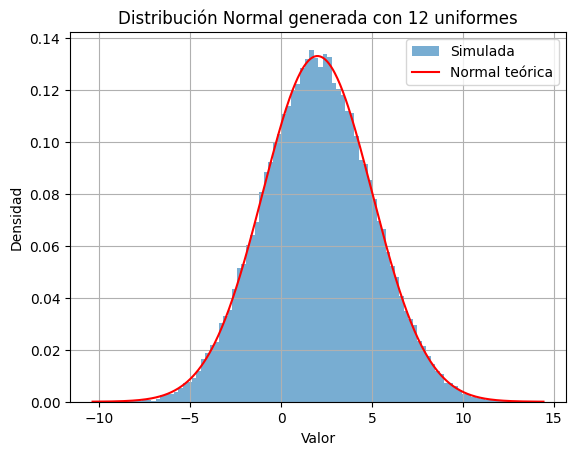

In [24]:
# Graficar histograma y comparación con distribución normal teórica
plt.hist(y, bins=100, density=True, alpha=0.6, label='Simulada')

# Curva normal teórica para comparación
x_vals = np.linspace(min(y), max(y), 500)
y_vals = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mu)/sigma)**2)
plt.plot(x_vals, y_vals, 'r', label='Normal teórica')

plt.title('Distribución Normal generada con 12 uniformes')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()